In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


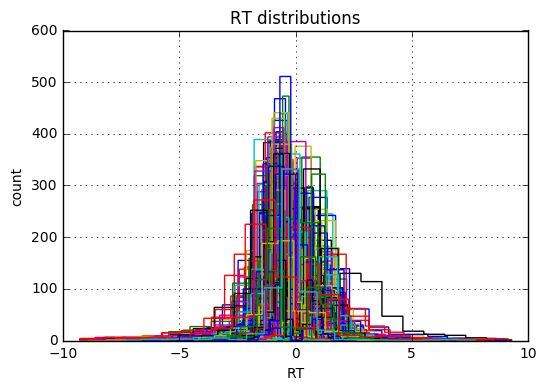

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (happy) and facial expression (angry)
hh1_data = data1.loc[(data1['emotionRating'] == 'happy') & (data1['expression'] == 'happy')]
hh1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
324,gc2le9xecjp1stz,3,2,happy,329,_faces/56_F_H_X.jpg,56_F_H_X,56,F,happy,baseline,1,0.916780,0,0,0,100,0,0
325,gc2le9xecjp1stz,3,2,happy,330,_faces/25_M_H_L.jpg,25_M_H_L,25,M,happy,lower,1,1.317000,0,0,0,50,0,0
332,gc2le9xecjp1stz,3,2,happy,337,_faces/56_F_H_U.jpg,56_F_H_U,56,F,happy,upper,1,1.142010,0,0,0,50,0,0
335,gc2le9xecjp1stz,3,2,happy,340,_faces/04_F_H_L.jpg,04_F_H_L,4,F,happy,lower,0,-0.997195,0,0,0,50,0,0
337,gc2le9xecjp1stz,3,2,happy,342,_faces/25_M_H_U.jpg,25_M_H_U,25,M,happy,upper,1,1.010970,0,0,0,50,0,0
342,gc2le9xecjp1stz,3,2,happy,347,_faces/25_M_H_X.jpg,25_M_H_X,25,M,happy,baseline,1,1.357665,0,0,0,100,0,0
345,gc2le9xecjp1stz,3,2,happy,350,_faces/09_M_H_U.jpg,09_M_H_U,9,M,happy,upper,1,1.282790,0,0,0,50,0,0
353,gc2le9xecjp1stz,3,2,happy,358,_faces/09_M_H_X.jpg,09_M_H_X,9,M,happy,baseline,1,1.173560,0,0,0,100,0,0
356,gc2le9xecjp1stz,3,2,happy,361,_faces/22_F_H_U.jpg,22_F_H_U,22,F,happy,upper,1,1.034370,0,0,0,50,0,0
367,gc2le9xecjp1stz,3,2,happy,372,_faces/04_F_H_U.jpg,04_F_H_U,4,F,happy,upper,1,1.056565,0,0,0,50,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
# none for hh1

In [6]:
# define model
m_hh1 = hddm.HDDMRegressor(hh1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 33333.7 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q         25q        50q        75q       97.5q       mc err
a                                   1.70826  0.0468982      1.6203     1.67552     1.7069    1.73889     1.80249   0.00115753
a_std                              0.585975   0.040211    0.512734    0.557522    0.58501   0.612364    0.668531   0.00112145
a_subj.02hcv424u29nd5w              1.79463   0.310296     1.29562     1.57163    1.75953    1.98131      2.4987     0.007801
a_subj.02k2uwlhgxnumn9              1.42556   0.259463     1.02283      1.2389    1.39123    1.57322     2.03639   0.00717425
a_subj.03g7h2hzq4o3g26              3.16538   0.439103     2.42745     2.85043    3.12572    3.42495     4.14165   0.00697754
a_subj.0nmr75cysk1ae0e              1.88316   0.247436     1.46923     1.70823    1.85841    2.03145     2.42633   0.00470039
a_subj.0t8qp67pqkw36cb                1.746   0.199398     1.39371     1.60292    1.73494    1.87237      2.1741   0.0

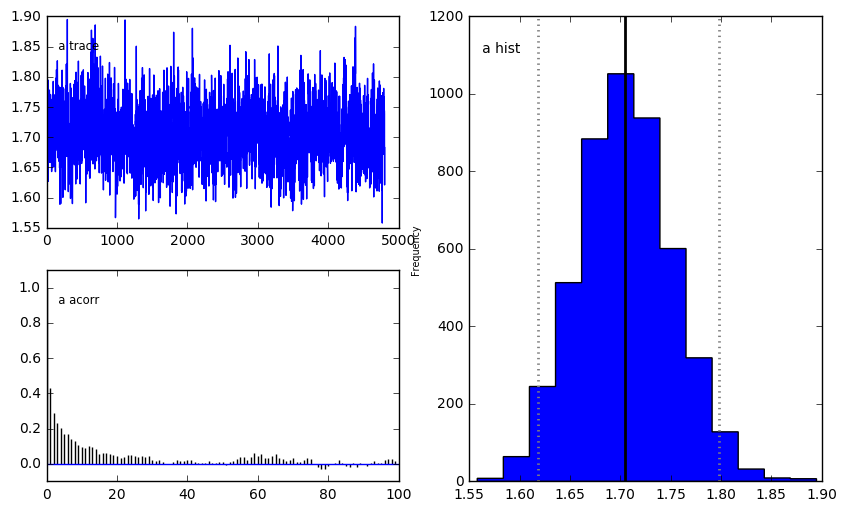

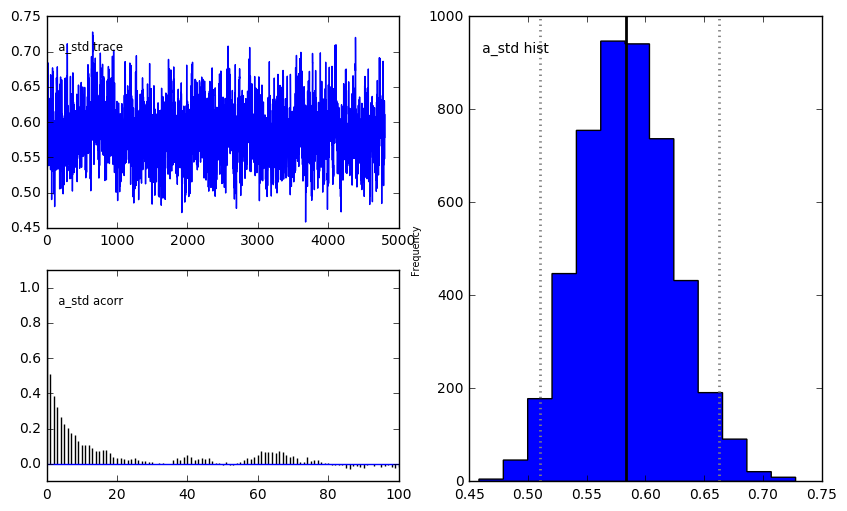

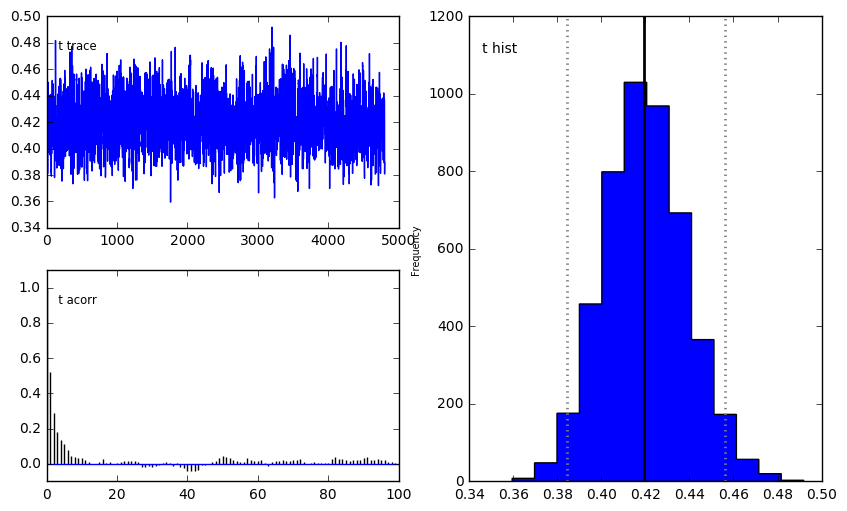

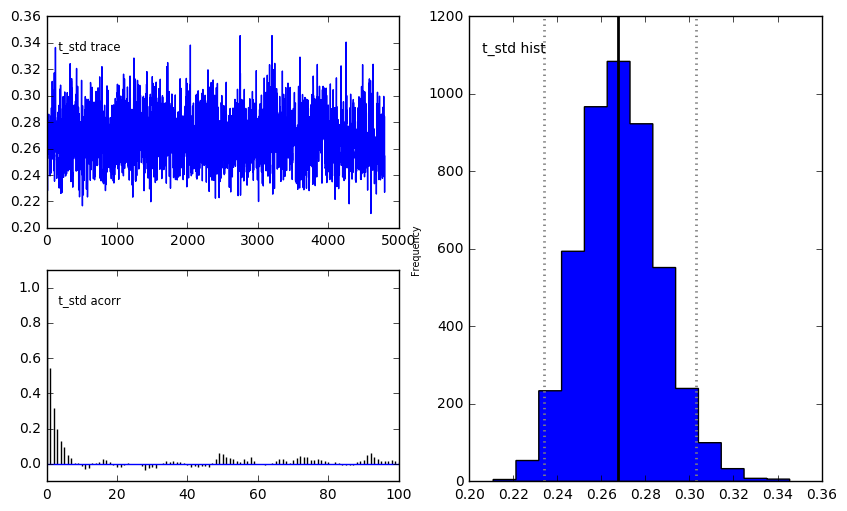

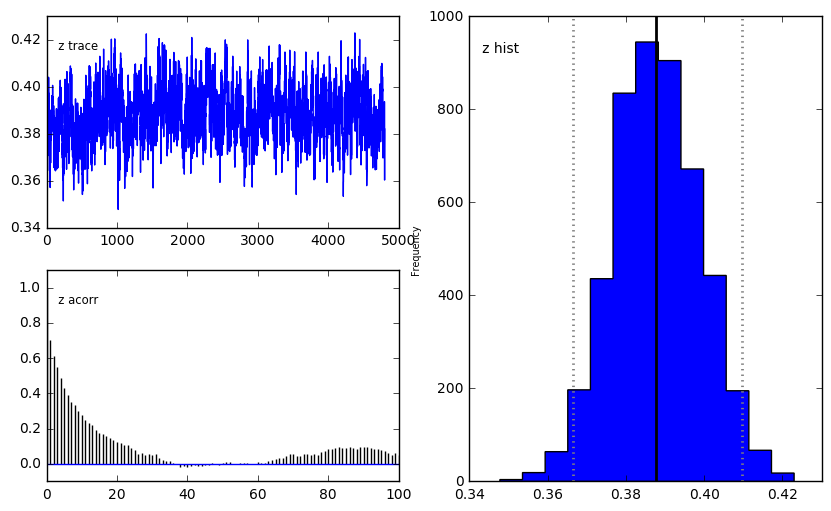

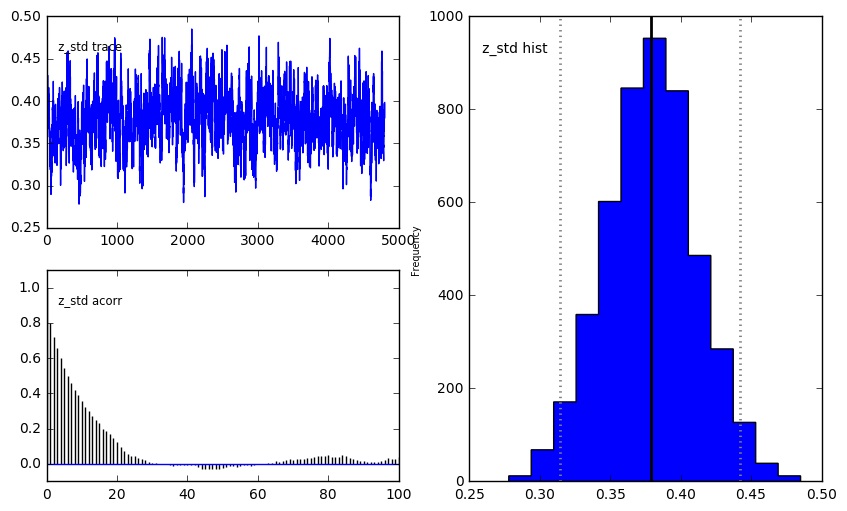

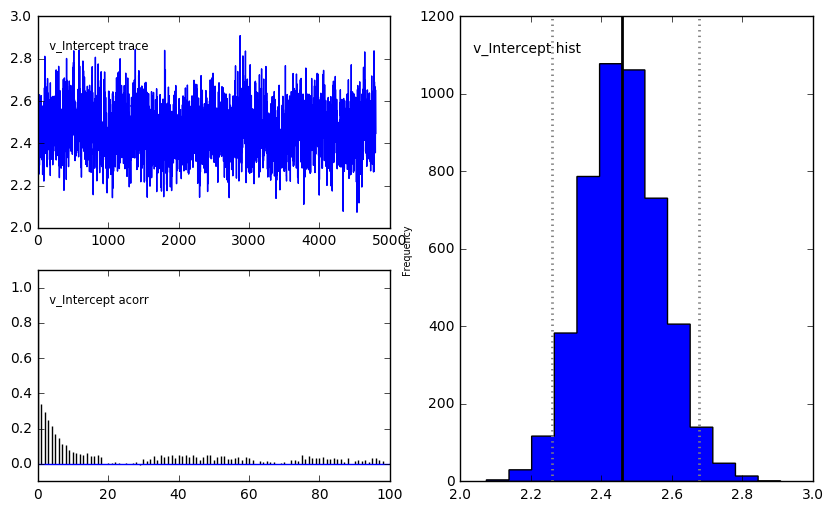

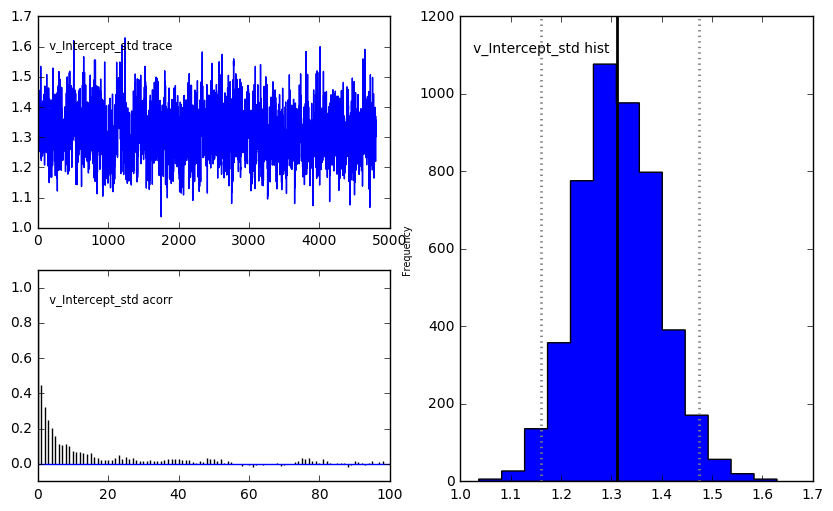

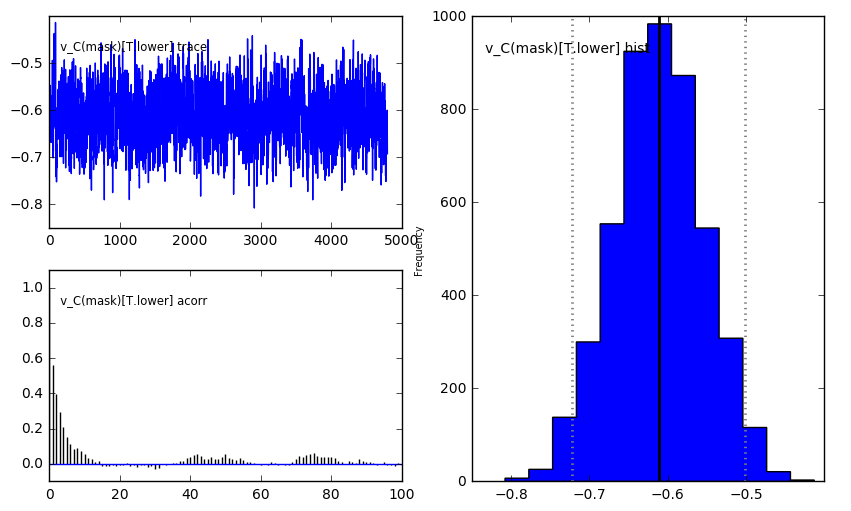

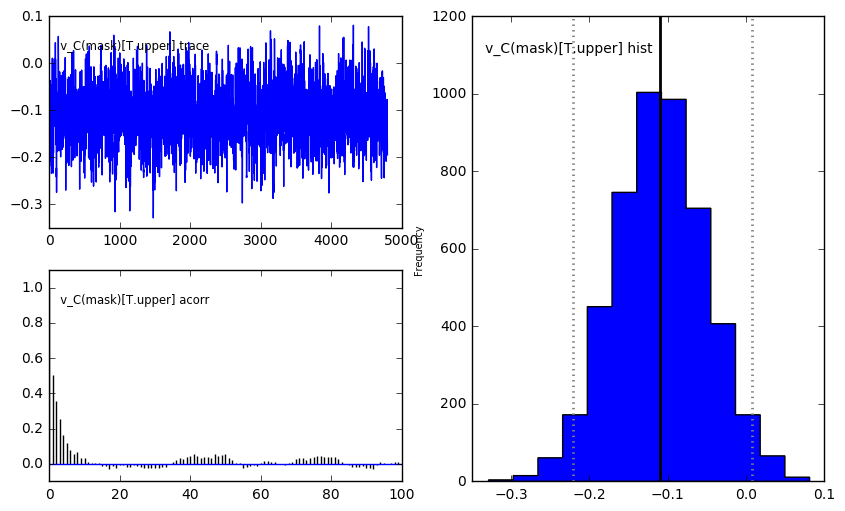

In [35]:
# run model
m_hh1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_hh1.print_stats()
m_hh1.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q       25q  \
a                                   1.70826  0.0468982     1.6203   1.67552   
a_std                              0.585975   0.040211   0.512734  0.557522   
a_subj.02hcv424u29nd5w              1.79463   0.310296    1.29562   1.57163   
a_subj.02k2uwlhgxnumn9              1.42556   0.259463    1.02283    1.2389   
a_subj.03g7h2hzq4o3g26              3.16538   0.439103    2.42745   2.85043   
a_subj.0nmr75cysk1ae0e              1.88316   0.247436    1.46923   1.70823   
a_subj.0t8qp67pqkw36cb                1.746   0.199398    1.39371   1.60292   
a_subj.0vfpn4uf3t031qu              1.03848   0.137356   0.802429  0.940808   
a_subj.11dsfdtym1yy5mx              1.88365   0.179044    1.56805   1.75691   
a_subj.1d3dadyu4ekqb4q              1.21037   0.163049   0.934071   1.09446   
a_subj.1mt2emp4645cbl1              2.70181   0.392245    2.04984   2.42042   
a_subj.1rst24mbtgy9rc8              1.43598   0.2120

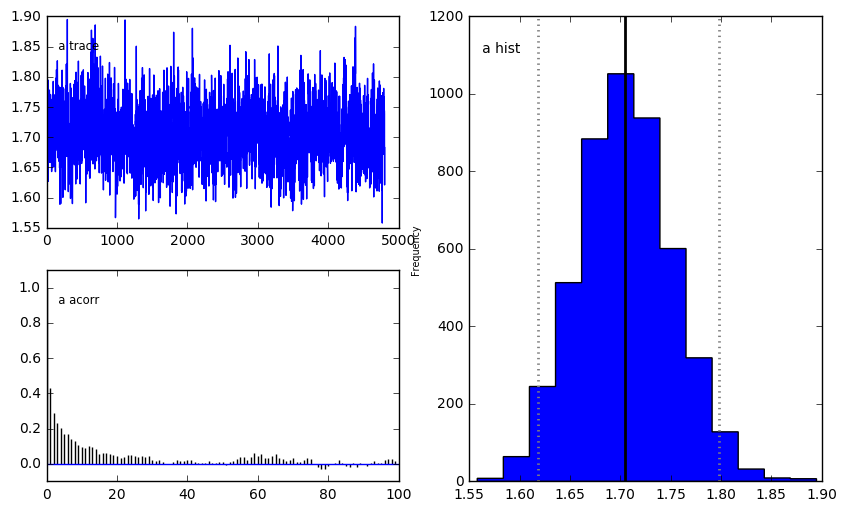

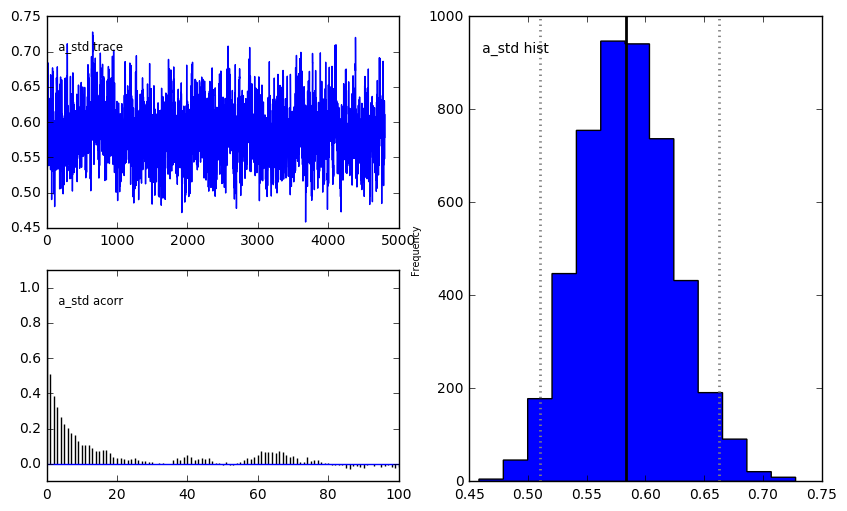

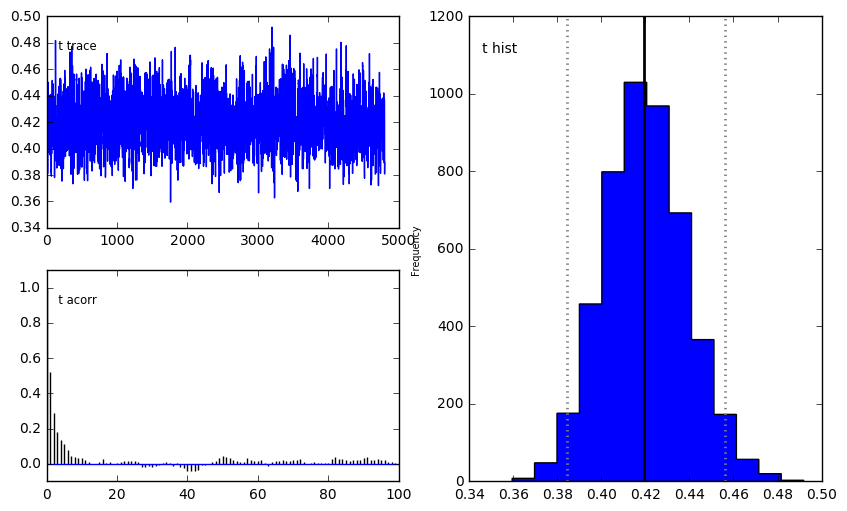

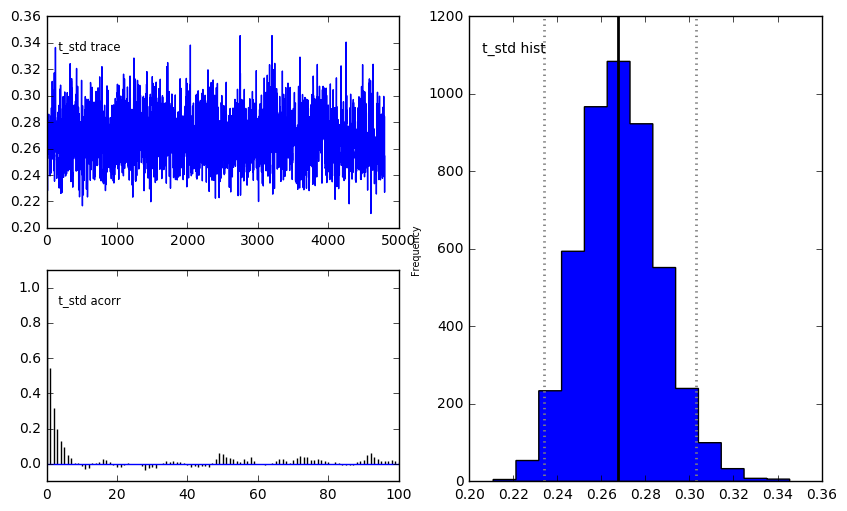

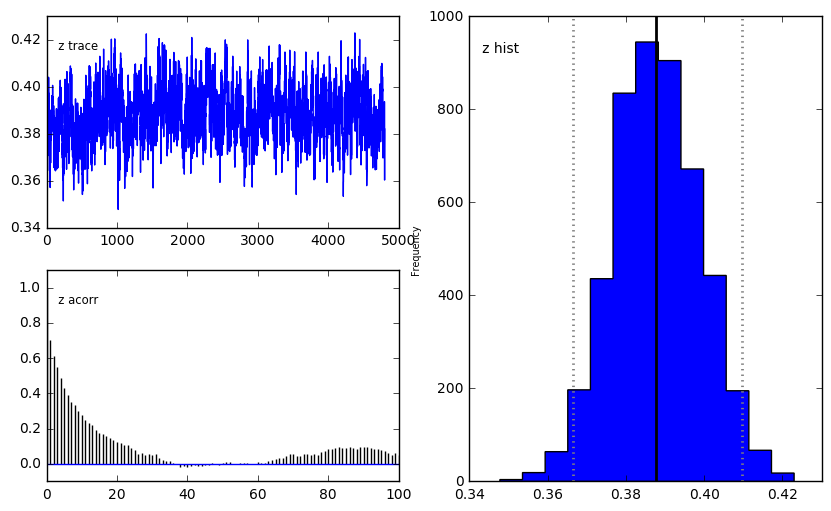

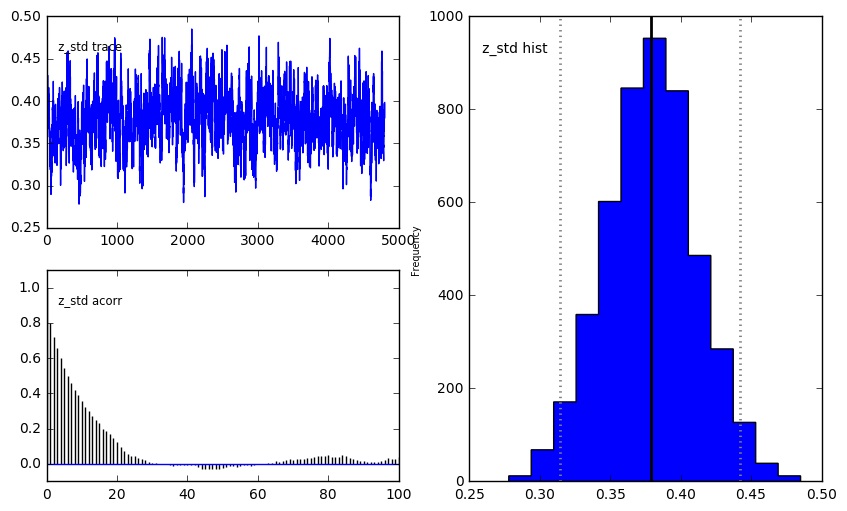

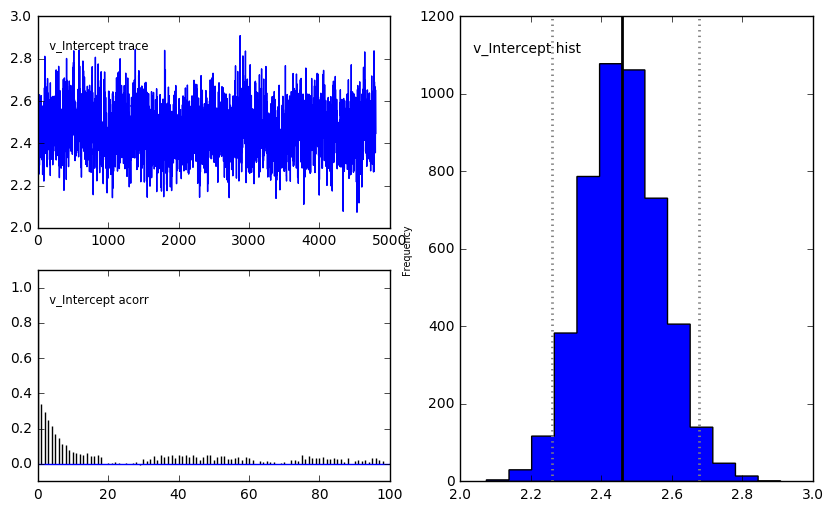

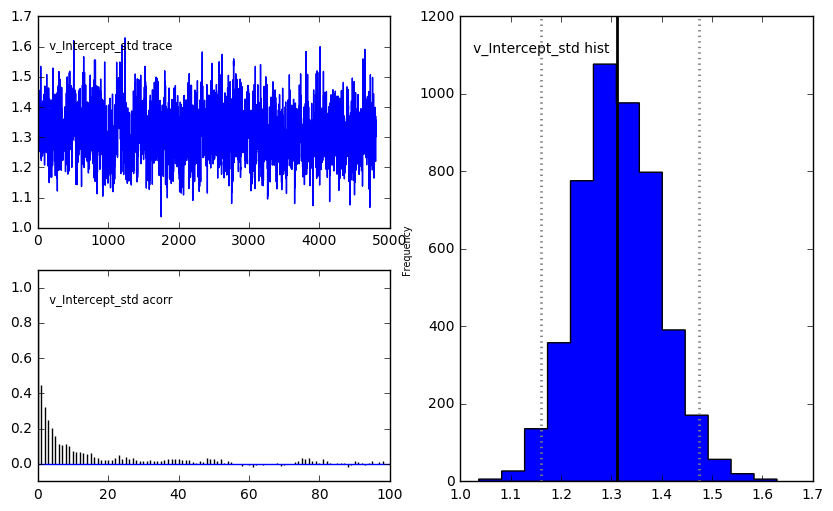

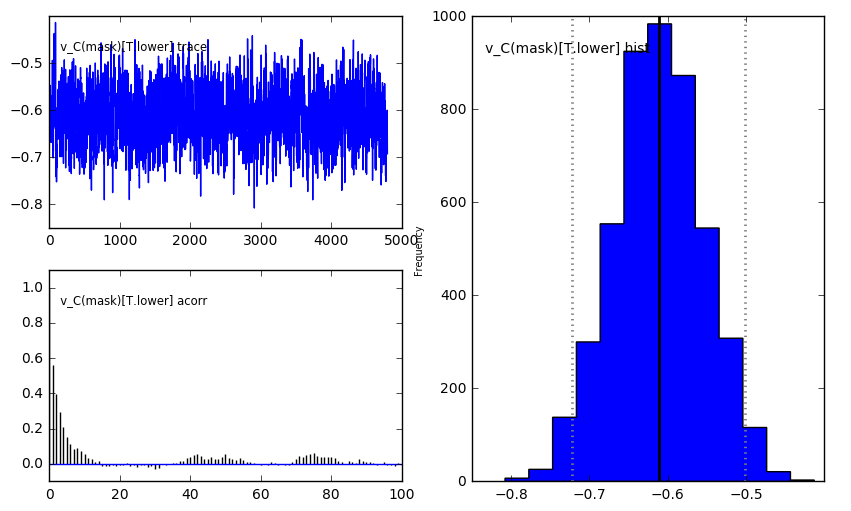

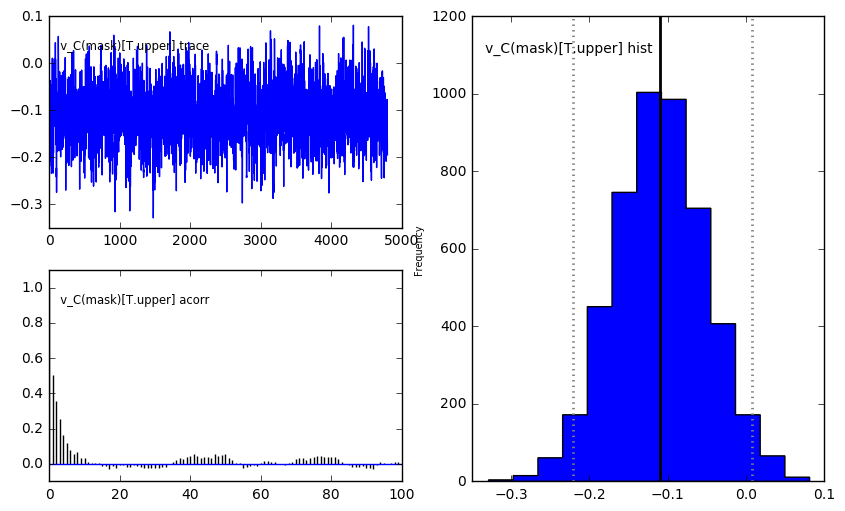

In [36]:
# save model stats
hh1_stats = m_hh1.gen_stats()
print(hh1_stats)
hh1_stats.to_csv('hh1_5000/faceMask_hddm_drift_maskFalseNegatives_hh1_5000.csv', index=True)

# save model posterior plots
m_hh1.plot_posteriors(path='hh1_5000/_posteriors', save=True)

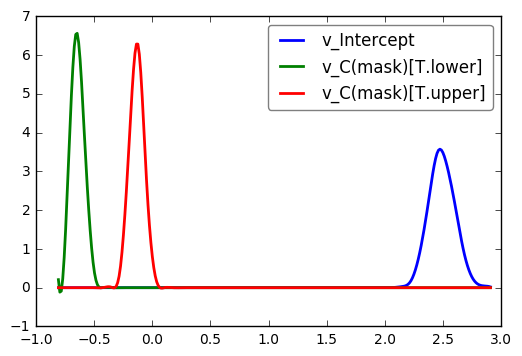

In [37]:
# plot model posteriors by mask
hh1_v_none, hh1_v_lower, hh1_v_upper = m_hh1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([hh1_v_none, hh1_v_lower, hh1_v_upper])
plt.savefig('hh1_5000/faceMask_hddm_drift_maskFalsePositives_hh1_5000_v_mask.pdf')

In [38]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(hh1_v_none > 0) = ", (hh1_v_none.trace() > 0).mean())
print("P(hh1_v_lower < 0) = ", (hh1_v_lower.trace() < 0).mean())
print("P(hh1_v_upper > 0) = ", (hh1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(hh1_v_lower < hh1_v_upper) = ", (hh1_v_lower.trace() < hh1_v_upper.trace()).mean())

P(hh1_v_none > 0) =  1.0
P(hh1_v_lower < 0) =  1.0
P(hh1_v_upper > 0) =  0.0325
P(hh1_v_lower < hh1_v_upper) =  1.0


In [21]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


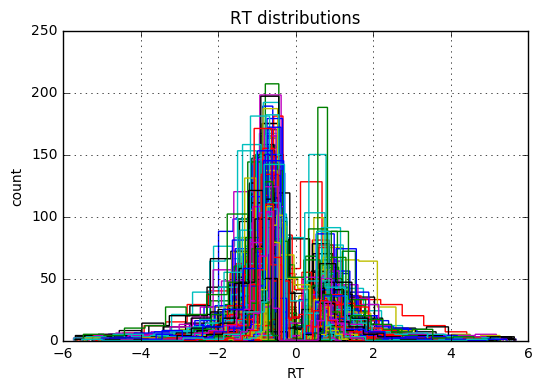

In [22]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [23]:
# subset dataset by emotion rating type (happy) and facial expression (happy)
hh2_data = data2.loc[(data2['emotionRating'] == 'happy') & (data2['expression'] == 'happy')]
hh2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
216,lbmmswtrr0mpvov,4,6,happy,217,_faces/AM11_H_L.jpg,AM11_H_L,AM11,A,M,happy,lower,1,1.230470,0,0,0,50,0,0
224,lbmmswtrr0mpvov,4,6,happy,225,_faces/HF05_H_L.jpg,HF05_H_L,HF05,H,F,happy,lower,1,0.637560,0,0,0,50,0,0
226,lbmmswtrr0mpvov,4,6,happy,227,_faces/AM11_H_X.jpg,AM11_H_X,AM11,A,M,happy,baseline,0,-0.586810,0,0,0,100,0,0
229,lbmmswtrr0mpvov,4,6,happy,230,_faces/HF05_H_X.jpg,HF05_H_X,HF05,H,F,happy,baseline,1,0.572350,0,0,0,100,0,0
233,lbmmswtrr0mpvov,4,6,happy,234,_faces/WM09_H_U.jpg,WM09_H_U,WM09,W,M,happy,upper,0,-0.564725,0,0,0,50,0,0
242,lbmmswtrr0mpvov,4,6,happy,243,_faces/WM09_H_L.jpg,WM09_H_L,WM09,W,M,happy,lower,1,0.727170,0,0,0,50,0,0
250,lbmmswtrr0mpvov,4,6,happy,251,_faces/HF05_H_U.jpg,HF05_H_U,HF05,H,F,happy,upper,1,0.644235,0,0,0,50,0,0
251,lbmmswtrr0mpvov,4,6,happy,252,_faces/WM09_H_X.jpg,WM09_H_X,WM09,W,M,happy,baseline,1,0.644815,0,0,0,100,0,0
256,lbmmswtrr0mpvov,4,6,happy,257,_faces/AM11_H_U.jpg,AM11_H_U,AM11,A,M,happy,upper,0,-0.900900,0,0,0,50,0,0
491,mr81dhy9r5lxu8r,3,1,happy,169,_faces/AM07_H_L.jpg,AM07_H_L,AM07,A,M,happy,lower,1,1.019000,0,0,0,50,0,0


In [24]:
# drop any subjects missing columns in design matrix (otherwise produces error)
hh2_data = hh2_data[(hh2_data.subj_idx != 'hdn2l3df216jykn') & (hh2_data.subj_idx != 'o8tx093cd8xp46a')]

In [25]:
# define model
m_hh2 = hddm.HDDMRegressor(hh2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 43480.5 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q        50q        75q      97.5q       mc err
a                                   1.50429   0.037118    1.43406    1.47927    1.50344    1.52863    1.58148   0.00159053
a_std                              0.418156  0.0345821   0.356093   0.394348   0.416867   0.439274   0.493087   0.00154012
a_subj.09coqg8hlpux6fe              1.39886   0.247592   0.974262    1.21952    1.37555    1.54729    1.94725   0.00594757
a_subj.0b3t2skj9mlhbkn              1.47188   0.254547    1.04074    1.29061    1.44309    1.63222    2.02264   0.00603161
a_subj.0bcg7mtj2n1jjw9               2.7343   0.405036    2.04956    2.44556    2.70212    2.97722    3.64442    0.0105625
a_subj.0s53r30oouek89b              2.37504   0.391499    1.72044    2.09387    2.34282    2.61279    3.23152    0.0106518
a_subj.0uj9gbhag3o1w1v              1.70126   0.363551    1.12296    1.43879    1.65349    1.91232    2.54298    0.0128268
a_subj.17nzn4k8r

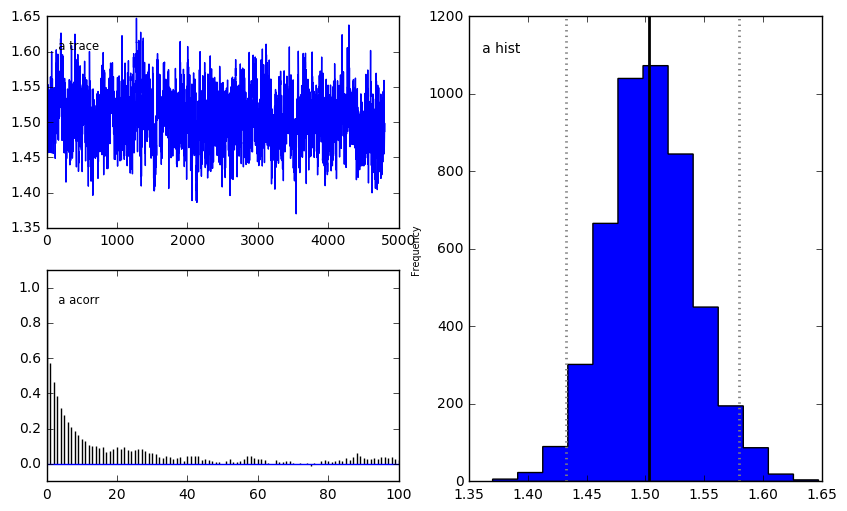

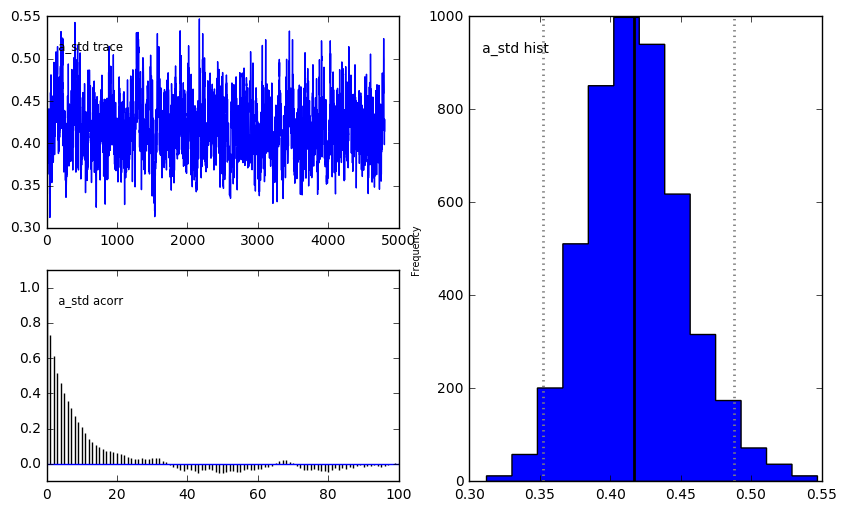

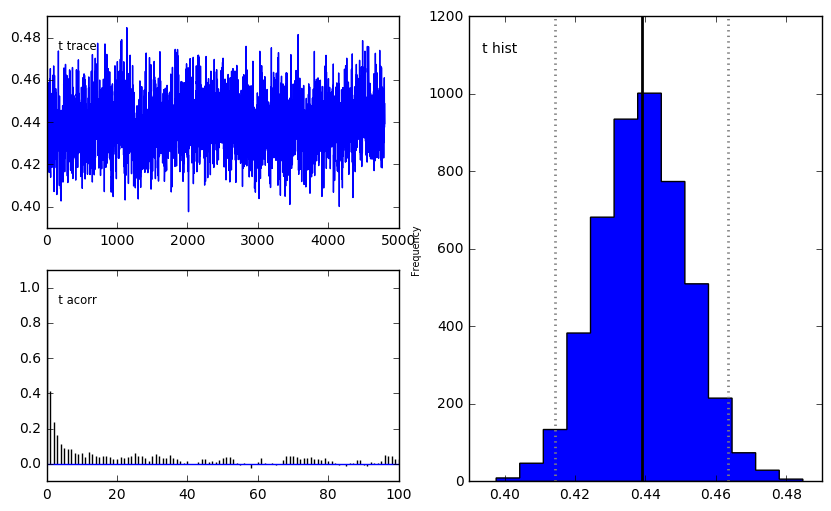

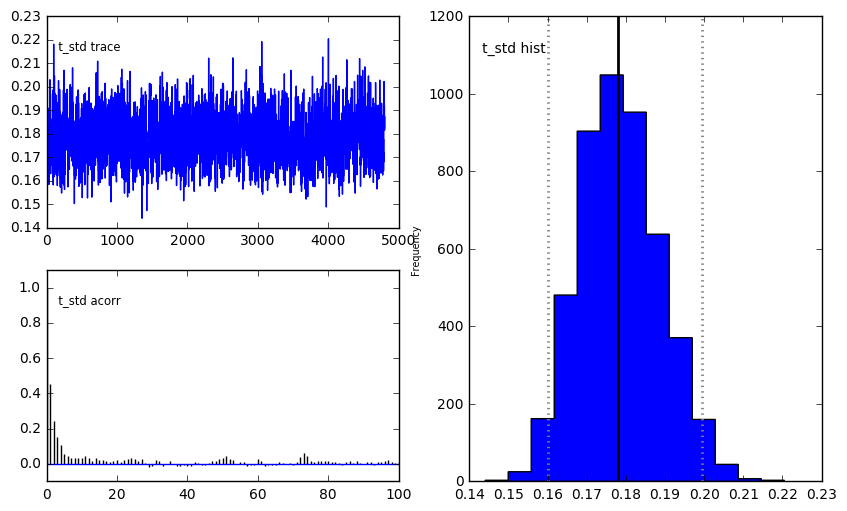

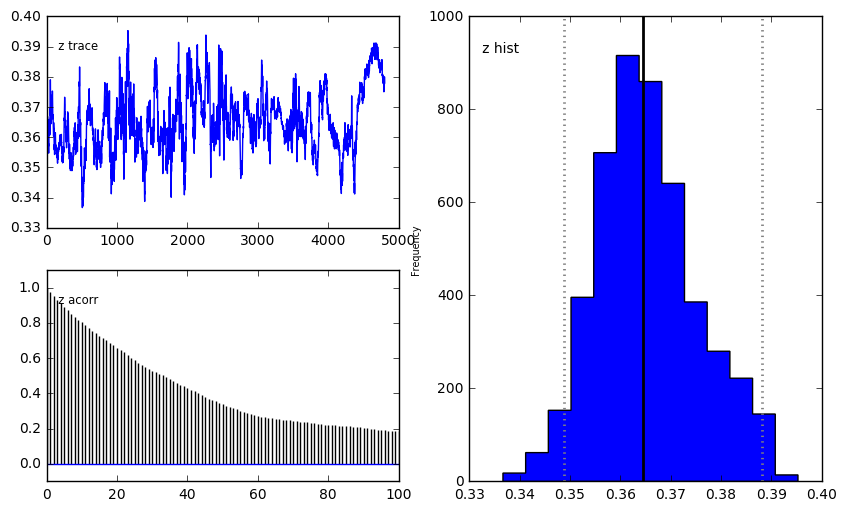

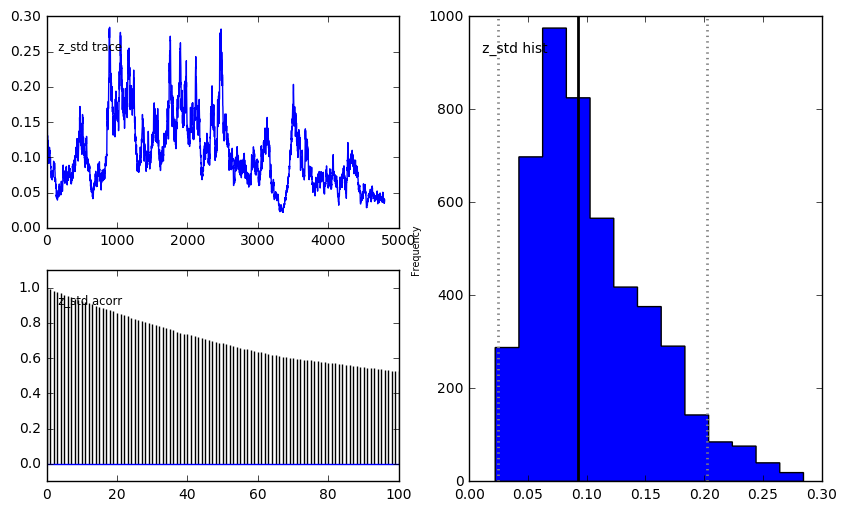

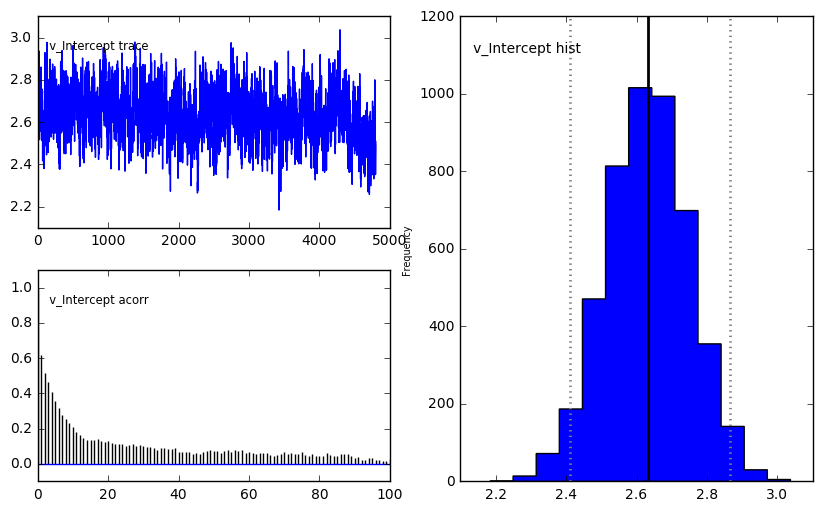

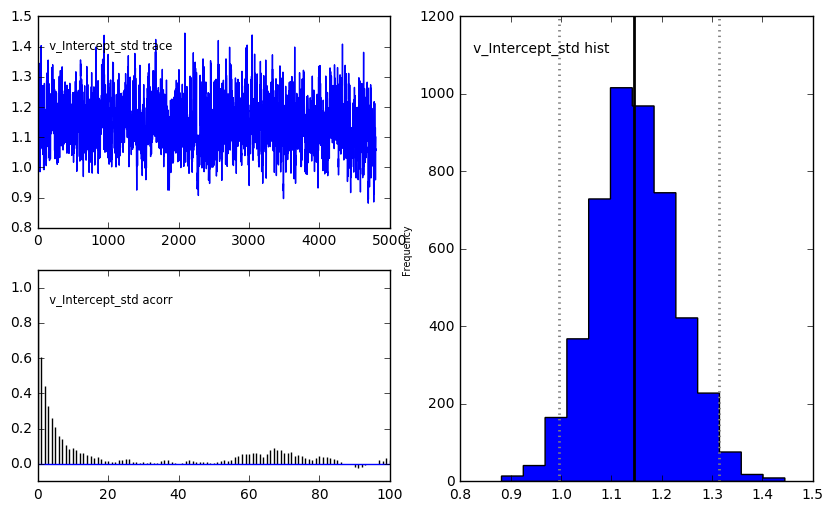

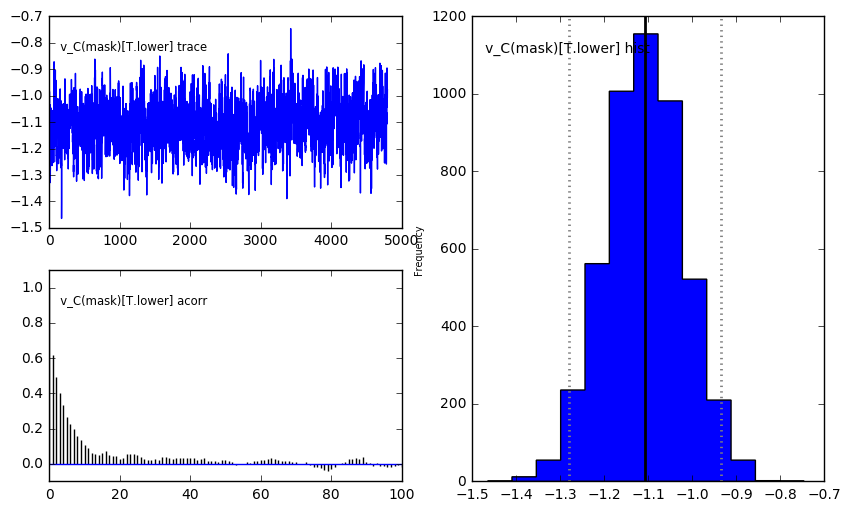

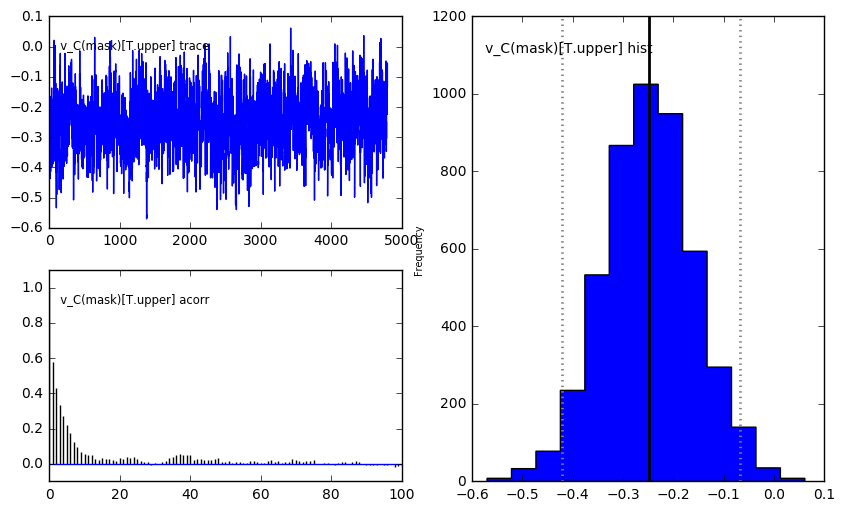

In [26]:
# run model
m_hh2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_hh2.print_stats()
m_hh2.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q       25q  \
a                                  1.50429   0.037118   1.43406   1.47927   
a_std                             0.418156  0.0345821  0.356093  0.394348   
a_subj.09coqg8hlpux6fe             1.39886   0.247592  0.974262   1.21952   
a_subj.0b3t2skj9mlhbkn             1.47188   0.254547   1.04074   1.29061   
a_subj.0bcg7mtj2n1jjw9              2.7343   0.405036   2.04956   2.44556   
a_subj.0s53r30oouek89b             2.37504   0.391499   1.72044   2.09387   
a_subj.0uj9gbhag3o1w1v             1.70126   0.363551   1.12296   1.43879   
a_subj.17nzn4k8r1qkmrn              1.5278   0.231171   1.12297   1.36051   
a_subj.1fdkw2qjx3hc3lk             1.09248   0.197619  0.774832  0.948545   
a_subj.1mla0dmotqefnav              2.5604   0.344571   1.98125   2.31596   
a_subj.23hr9tl84h3zhw3             1.34806   0.234237  0.944497   1.18402   
a_subj.27muqwvalwne26r             1.64831   0.333855   1.09041   1.40715   

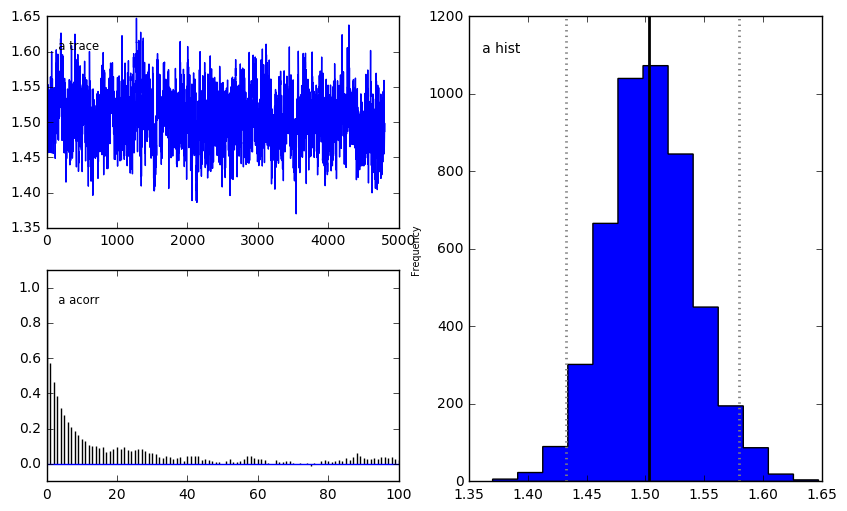

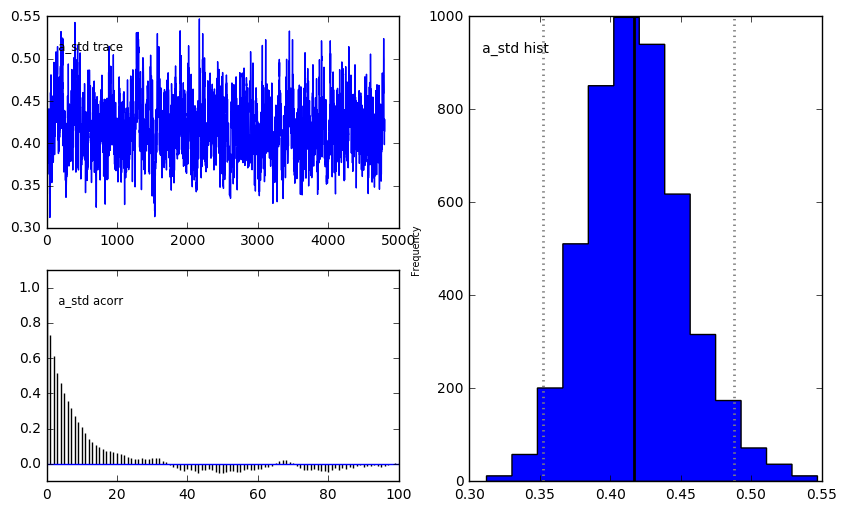

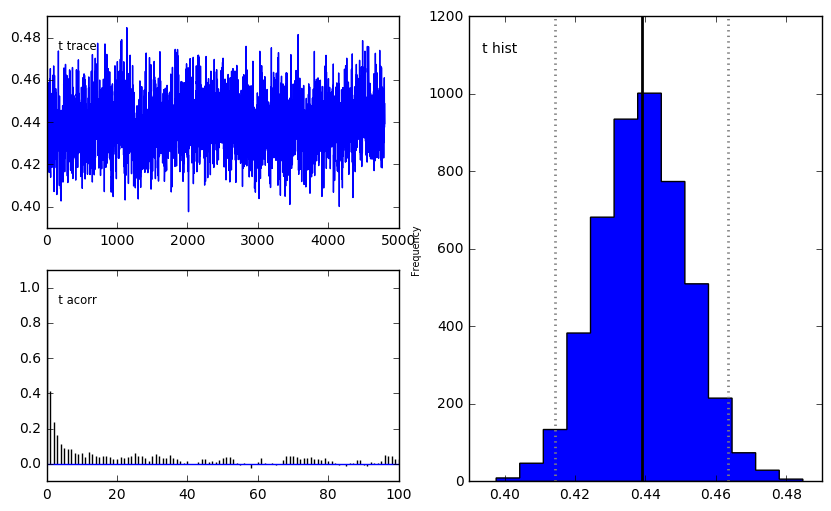

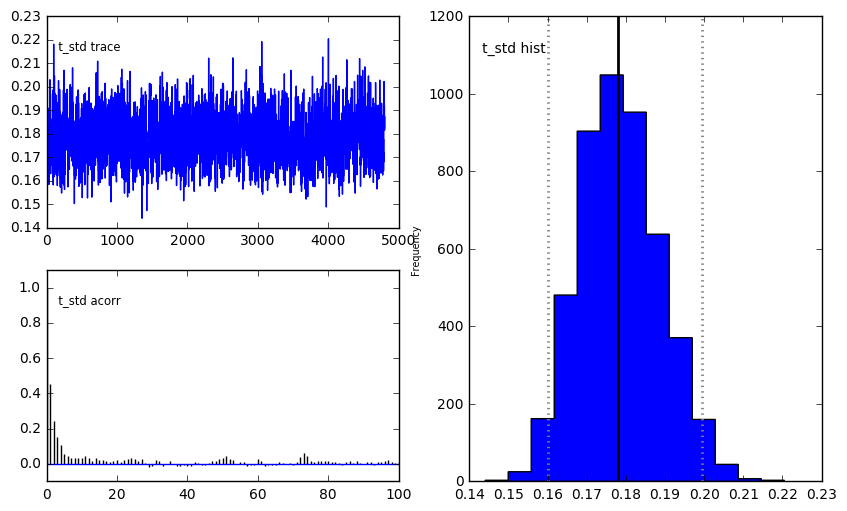

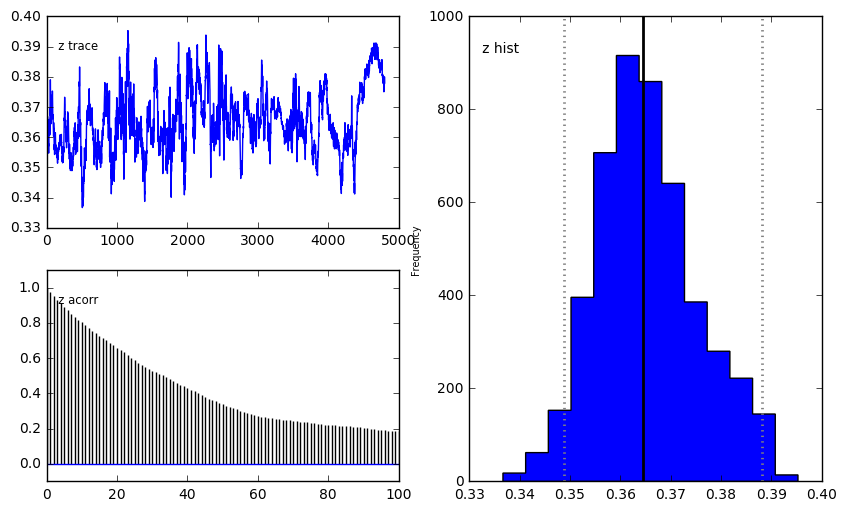

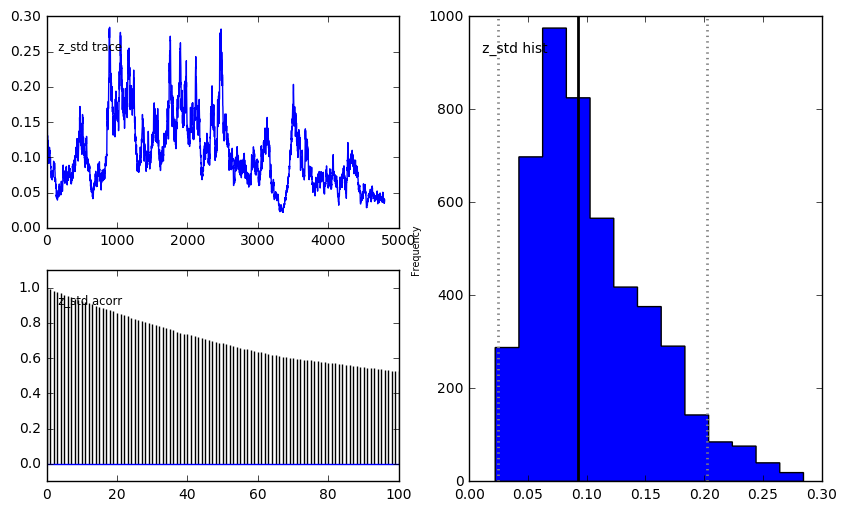

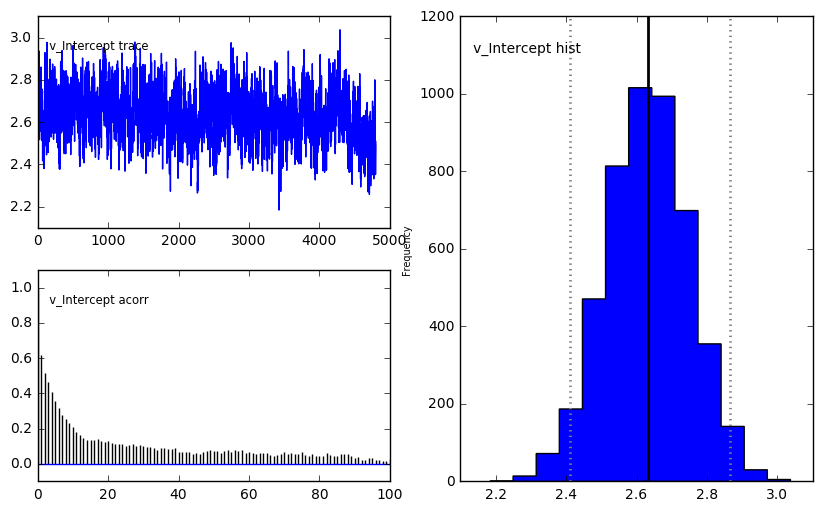

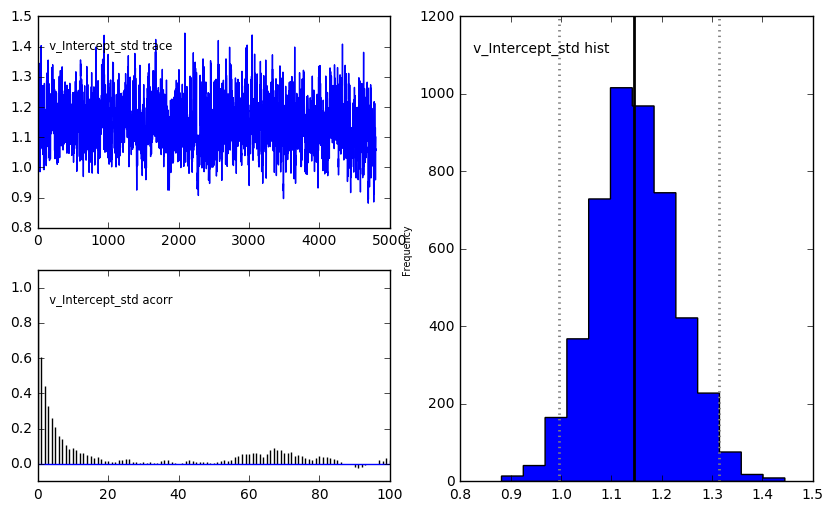

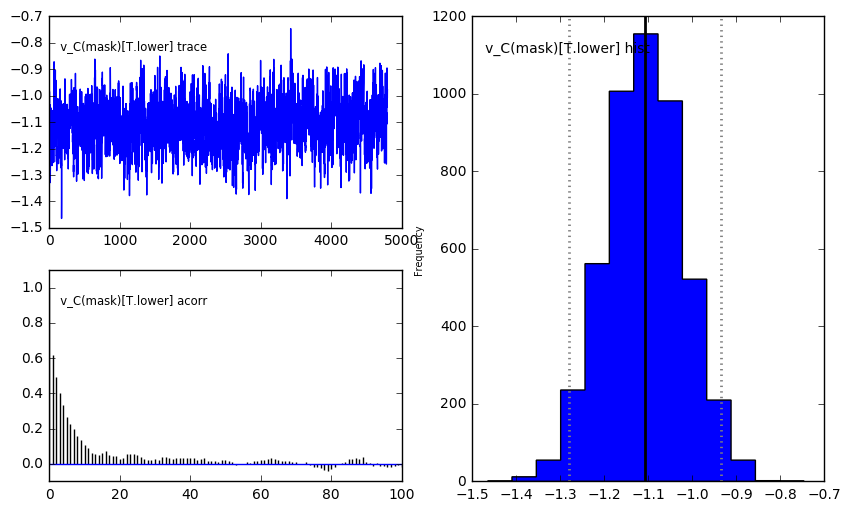

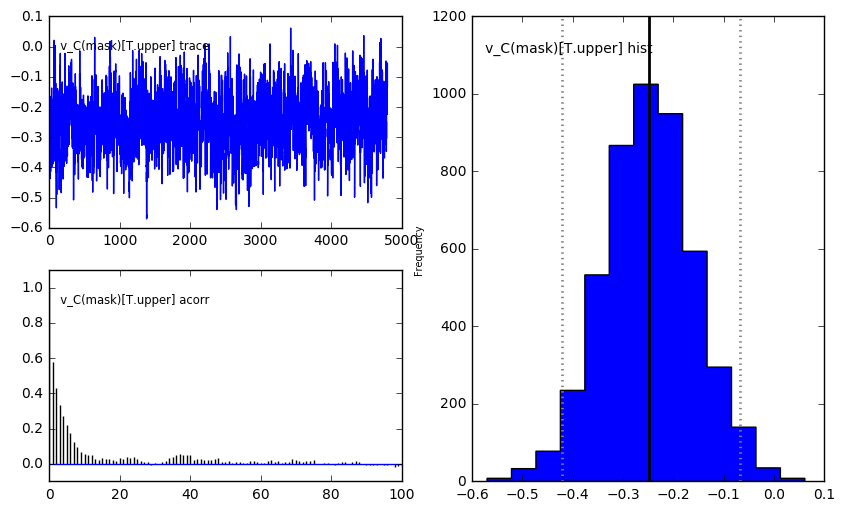

In [27]:
# save model stats
hh2_stats = m_hh2.gen_stats()
print(hh2_stats)
hh2_stats.to_csv('hh2_5000/faceMask2_hddm_drift_maskFalseNegatives_hh2_5000.csv', index=True)

# save model posterior plots
m_hh2.plot_posteriors(path='hh2_5000/_posteriors', save=True)

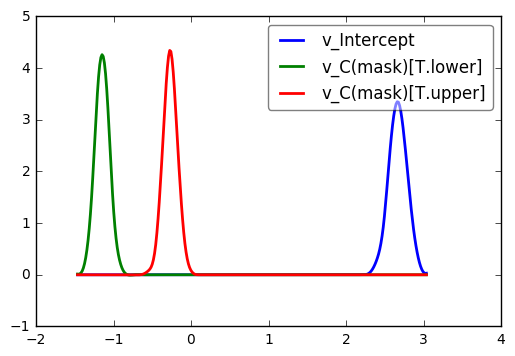

In [28]:
# plot model posteriors by mask
hh2_v_none, hh2_v_lower, hh2_v_upper = m_hh2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([hh2_v_none, hh2_v_lower, hh2_v_upper])
plt.savefig('hh2_5000/faceMask2_hddm_drift_maskFalsePositives_hh2_5000_v_mask.pdf')

In [45]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(hh2_v_none < 0) = ", (hh2_v_none.trace() < 0).mean())
print("P(hh2_v_lower > 0) = ", (hh2_v_lower.trace() > 0).mean())
print("P(hh2_v_upper > 0) = ", (hh2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(hh2_v_lower > hh2_v_upper) = ", (hh2_v_lower.trace() > hh2_v_upper.trace()).mean())

P(hh2_v_none < 0) =  0.0
P(hh2_v_lower > 0) =  0.0
P(hh2_v_upper > 0) =  0.00291666666667
P(hh2_v_lower > hh2_v_upper) =  0.0


In [46]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(hh1_v_none > hh2_v_none) = ", ((hh1_v_none.trace() > hh2_v_none.trace()).mean()))
print("P(hh1_v_lower < hh2_v_lower) = ", ((hh1_v_lower.trace() < hh2_v_lower.trace()).mean()))
print("P(hh1_v_upper < hh2_v_upper) = ", ((hh1_v_upper.trace() < hh2_v_upper.trace()).mean()))


P(hh1_v_none > hh2_v_none) =  0.145625
P(hh1_v_lower < hh2_v_lower) =  0.0
P(hh1_v_upper < hh2_v_upper) =  0.100625


In [42]:
## adding together the relative values:
hh1_v_none_plus_lower = hh1_v_none.trace() + hh1_v_lower.trace()
hh1_v_none_plus_upper = hh1_v_none.trace() + hh1_v_upper.trace()
hh2_v_none_plus_lower = hh2_v_none.trace() + hh2_v_lower.trace()
hh2_v_none_plus_upper = hh2_v_none.trace() + hh2_v_upper.trace()

In [47]:
print("P(hh1_v_none_plus_lower < hh2_v_none_plus_lower) = ", (hh1_v_none_plus_lower < hh2_v_none_plus_lower).mean())
print("P(hh1_v_none_plus_upper > hh2_v_none_plus_upper) = ", (hh1_v_none_plus_upper > hh2_v_none_plus_upper).mean())

P(hh1_v_none_plus_lower < hh2_v_none_plus_lower) =  0.015
P(hh1_v_none_plus_upper > hh2_v_none_plus_upper) =  0.4225
